In [38]:
#importing libraries
import numpy as np
import pandas as pd

In [39]:
dataset = pd.read_csv("twitter.csv")

In [40]:
dataset.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [41]:
#The text is classified as: hate-speech, offensive language, and neither
dataset.isnull()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
24778,False,False,False,False,False,False,False
24779,False,False,False,False,False,False,False
24780,False,False,False,False,False,False,False
24781,False,False,False,False,False,False,False


In [42]:
#since we are unable to see how many null values are there., use sum function to get the number of null values in each column
dataset.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [43]:
#all the columns are having non null values

In [44]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [45]:
#statistical analysis is not necessarily required in this case like finding mean 
#min, max, quartiles etc since this dataset is not having any values that are required 
#to be calculated
dataset.describe()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


In [46]:
#if we observe count , hate_speech we can say that from day to day how much of hate that users are delivering from day to day
#class:
#if class = 0 it is hate speech
#if class = 1 it is offensive 
#if class = 2 it is neither offensive nor hatespeech
#offensive language is the frequency that tells how many times offensive words are used
#since priority is given for hate speech , if both offensive and hatespeech are there., it will treat class = 0

In [47]:
dataset["labels"]=dataset["class"].map({0:"Hate speech",
                                       1:"Offensive Language",
                                       2:"No hate or offensive language"})

In [48]:
dataset

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,labels
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,No hate or offensive language
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language
...,...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,Offensive Language
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an...",No hate or offensive language
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...,Offensive Language
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies,Offensive Language


In [49]:
data = dataset[["tweet","labels"]]

In [50]:
data

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,No hate or offensive language
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,Offensive Language
24779,"you've gone and broke the wrong heart baby, an...",No hate or offensive language
24780,young buck wanna eat!!.. dat nigguh like I ain...,Offensive Language
24781,youu got wild bitches tellin you lies,Offensive Language


### prepocessing

In [56]:
# import regular expression to get rid of special symbols and numbers in the usernames etc
import re
import nltk
nltk.download()
import string
# we removal of stop words and Stemming the words
#for removal of punctuations import string package

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [57]:
#importing stopwords
from nltk.corpus import stopwords
stopwords = set(stopwords.words("english"))

In [58]:
#import stemming
stemmer = nltk.SnowballStemmer("english")

In [62]:
#Data Cleaning
def clean_data(text):
    text = str(text).lower()
    text = re.sub("https?://\S+www\.S+",'',text)
    text = re.sub('\[*?\]','',text)
    text = re.sub('<.*?>+','',text)
    text = re.sub('[%s]' %re.escape(string.punctuation),'',text)
    text = re.sub('\n','',text)
    text = re.sub('\w*\d\w*','',text)
    #stop words removal
    text = [word for word in text.split(' ') if word not in stopwords]
    text = " ".join(text)
    #stemming the text
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text

In [63]:
data["tweet"]= data["tweet"].apply(clean_data)

C:\Users\Surya\AppData\Local\Temp\ipykernel_2696\475231937.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["tweet"]= data["tweet"].apply(clean_data)


In [64]:
data

,tweet,labels
0,rt mayasolov woman shouldnt complain clean ho...,No hate or offensive language
1,rt boy dat coldtyga dwn bad cuffin dat hoe ...,Offensive Language
2,rt urkindofbrand dawg rt ever fuck bitch sta...,Offensive Language
3,rt cganderson vivabas look like tranni,Offensive Language
4,rt shenikarobert shit hear might true might f...,Offensive Language
...,...,...
24778,yous muthafin lie coreyemanuel right tl tras...,Offensive Language
24779,youv gone broke wrong heart babi drove redneck...,No hate or offensive language
24780,young buck wanna eat dat nigguh like aint fuck...,Offensive Language
24781,youu got wild bitch tellin lie,Offensive Language


In [65]:
X=np.array(data["tweet"])
y=np.array(data["labels"])

In [66]:
X

array([' rt mayasolov woman shouldnt complain clean hous amp man alway take trash',
       ' rt  boy dat coldtyga dwn bad cuffin dat hoe  place',
       ' rt urkindofbrand dawg rt  ever fuck bitch start cri confus shit',
       ..., 'young buck wanna eat dat nigguh like aint fuckin dis',
       'youu got wild bitch tellin lie',
       'ruffl  ntac eileen dahlia  beauti color combin pink orang yellow amp white coll '],
      dtype=object)

In [67]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [68]:
cv=CountVectorizer()
X=cv.fit_transform(X)

In [69]:
X

<24783x26152 sparse matrix of type '<class 'numpy.int64'>'
	with 198309 stored elements in Compressed Sparse Row format>

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state = 42)

In [71]:
X_train

<16604x26152 sparse matrix of type '<class 'numpy.int64'>'
	with 132909 stored elements in Compressed Sparse Row format>

In [73]:
#Building out the ML model
from sklearn.tree import DecisionTreeClassifier

In [77]:
dt=DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [78]:
y_pred = dt.predict(X_test)

In [82]:
#Confusion matrix and accuracy 
from sklearn.metrics import confusion_matrix
cn = confusion_matrix(y_test, y_pred)
cn

array([[ 152,   31,  282],
       [  36, 1077,  266],
       [ 235,  217, 5883]], dtype=int64)

In [85]:
#data visualisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: >

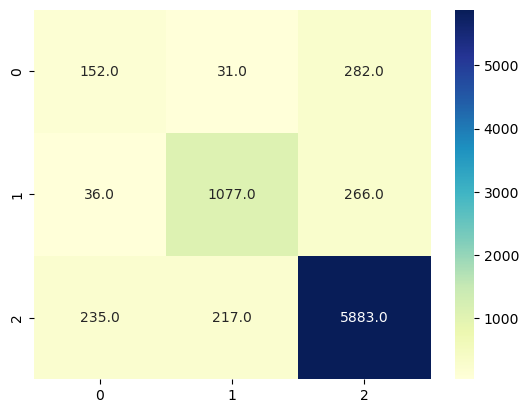

In [91]:
sns.heatmap(cn, annot=True, fmt= ".1f", cmap = "YlGnBu")

In [92]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8695439540286098

In [95]:
sample = "Let's unite and kill all the people who are protesting against the government"
sample = clean_data(sample)

In [96]:
sample

'let unit kill peopl protest govern'

In [98]:
data1 = cv.transform([sample]).toarray()

In [99]:
data1

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [100]:
dt.predict(data1)

array(['Hate speech'], dtype=object)

In [101]:
def message(message1):
    clean_data(message1)
    data2 = cv.transform([message1]).toarray()
    message_type = dt.predict(data2)
    return message_type

In [102]:
message("I want to kill this person tonight")

array(['Hate speech'], dtype=object)

In [103]:
message("he helped me a lot. He is a good boy")

array(['No hate or offensive language'], dtype=object)